# Statistics for data science - course project

## Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats

## Load the Boston Housing dataset

In [3]:
boston_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
#print out the first 5 rows of the data
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Median value of owner-occupied homes

For the "Median value of owner-occupied homes", provide a Boxplot

Text(0.5, 1.0, 'Median Value of owner-occupied homes')

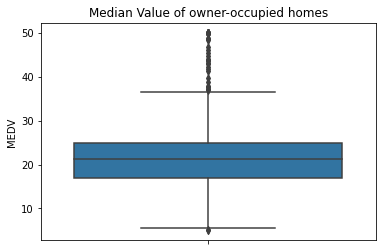

In [5]:
ax=sns.boxplot(y="MEDV",data=boston_df)
plt.title("Median Value of owner-occupied homes")

## Charles River variable

Provide a bar plot for the Charles River variable

Text(0.5, 1.0, 'Charles River variable')

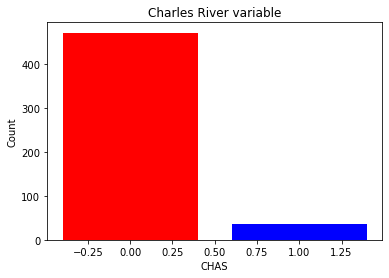

In [6]:
plt.bar(boston_df.CHAS.unique(),boston_df.CHAS.value_counts(),color=["red","blue"])
plt.xlabel("CHAS")
plt.ylabel("Count")
plt.title("Charles River variable")

## MEDV vs AGE

Provide a Boxplot for the MEDV variable vs AGE variable (Discretize the AGE variable into 3 groups of 35 years and younger, between 35 and 70 years, and 70 years and older).

In [7]:
boston_df.loc[(boston_df.AGE<=35),'age_group']='35 years and younger'
boston_df.loc[((boston_df.AGE>35)&(boston_df.AGE<70)),'age_group']='between 35 and 70 years'
boston_df.loc[(boston_df.AGE>=70),'age_group']='70 years and older'

Text(0, 0.5, 'Median Value')

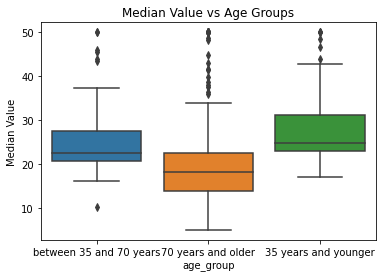

In [8]:
ax=sns.boxplot(x="age_group",y="MEDV",data=boston_df)
plt.title("Median Value vs Age Groups")
plt.ylabel("Median Value")

## Relationship between Nitric Oxide Concentrations and the proportion of non-retail business acres per town

Provide a scatterplot to show the relationship between Nitric Oxide Concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0, 0.5, 'Proportion of non-retail business areas')

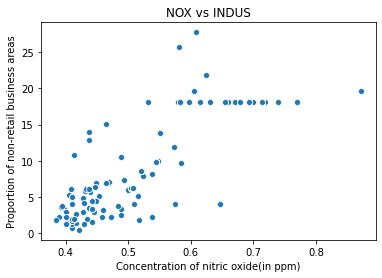

In [9]:
ax=sns.scatterplot(x="NOX",y="INDUS",data=boston_df)
plt.title("NOX vs INDUS")
plt.xlabel("Concentration of nitric oxide(in ppm)")
plt.ylabel("Proportion of non-retail business areas")

From the above scatterplot, we can say that there is a positive sloping relationship between concentration of Nitric Oxides and the proportion of non-retail business acres per town. But as the concentration grows more than 0.6ppm, the industrial area remains approximately the same.

## Pupil to Teachers Ratio Distribution

Create a histogram for the pupil to teacher ratio variable.

Text(0.5, 1.0, 'Students to Teachers Ratio Distribution')

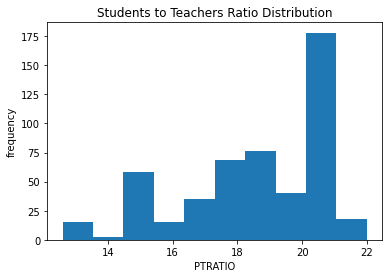

In [10]:
plt.hist(boston_df["PTRATIO"])
plt.xlabel("PTRATIO")
plt.ylabel("frequency")
plt.title("Students to Teachers Ratio Distribution")

## Use the appropriate test to answer the questions provided

### 1. Is there a significant difference in median value of houses bounded by the Charles River or not?(T-test for independent samples)

#### Stating the Hypothesis:

* **$H_0:\mu_1=\mu_2$** (There is no difference in median value of houses bounded by the Charles River).
* **$H_1:\mu_1\ne\mu_2$** (There is a difference in median value of houses bounded by the Charles River).

**Setting $\alpha$=0.05**

In [11]:
scipy.stats.ttest_ind(boston_df[boston_df.CHAS==1].MEDV,boston_df[boston_df.CHAS==0].MEDV,equal_var=True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is a significant difference in median value of houses bounded by the Charles river.

### 2. Is there a difference in median values of houses(MEDV) for each proportion of owner occupied units built prior to 1940(AGE)?(ANOVA)

First, we group the data into categories as the one-way ANOVA can't work with continuous variable.
* 35 years and younger
* Between 35 and 70 years
* 70 years and older

In [12]:
boston_df.loc[(boston_df.AGE<=35),'age_group']='35 years and younger'
boston_df.loc[((boston_df.AGE>35)&(boston_df.AGE<70)),'age_group']='Between 35 and 70 years'
boston_df.loc[(boston_df.AGE>=70),'age_group']='70 years and older'

#### Stating the Hypothesis:

* **$H_0:\mu_1=\mu_2=\mu_3$** (The three population means are equal)
* **$H_1$:** (Atleast one of the means differ)

**Setting $\alpha$=0.05**

In [13]:
#test for equality of variance
scipy.stats.levene(boston_df[boston_df.age_group=='35 years and younger']['MEDV'],
                   boston_df[boston_df.age_group=='Between 35 and 70 years']['MEDV'],
                   boston_df[boston_df.age_group=='70 years and older']['MEDV'],center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

First, separate the three samples (one for each category) into a variable each.

In [14]:
thirtyfive_lower=boston_df[boston_df['age_group']=='35 years and younger']['MEDV']
thirtyfive_seventy=boston_df[boston_df['age_group']=='Between 35 and 70 years']['MEDV']
seventy_older=boston_df[boston_df['age_group']=='70 years and older']['MEDV']

Now, run a one-way ANOVA.

In [15]:
scipy.stats.f_oneway(thirtyfive_lower,thirtyfive_seventy,seventy_older)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses for each proportion of owner occupied units built prior to 1940.

### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#### Stating the Hypothesis:

* **$H_0$:** There is no relationship between Nitric oxide concentration(NOX) and proportion of non-retail business acres per town(INDUS).
* **$H_1$:** There is a relationship between Nitric oxide concentration(NOX) and proportion of non-retail business acres per town(INDUS).

**Setting $\alpha$=0.05**

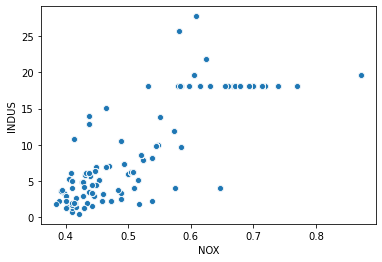

In [16]:
ax=sns.scatterplot(x="NOX",y="INDUS",data=boston_df)

In [17]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

(0.7636514469209149, 7.913361061240043e-98)

**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis and conclude that there exists a relationship between nitric oxide concentrations and proportions of non-retail business acres per town. 

### 4. What is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?(Regression analysis)

#### Stating the Hypothesis:

* **$H_0: \beta_1=0$** (There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes).
* **$H_1: \beta_1\ne0$** (There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes).

In [21]:
## X is the input variable(or independent variable)
X=boston_df["DIS"]
## y is the target variable(or dependent variable)
y=boston_df["MEDV"]
## add an intercept (beta_0) to our model
X=sm.add_constant(X)

model=sm.OLS(y,X).fit()
predictions=model.predict(X)

## print out the statistics
model.summary()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           1.21e-08
Time:                        06:53:14   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value is less than the alpha ($\alpha$) level=0.05, so we reject the null hypothesis as there is evidence that there is an additional impact of 1.0916 of weighted distance to the five Boston employment centres on the median value of owner occupied homes.